## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('https://data.covid19bharat.org/csv/latest/case_time_series.csv')

## Calculating moving average

In [2]:
def movingaverage(interval, window_size=7):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

In [11]:
date = np.array(data['Date_YMD'])
dailyCases = data['Daily Confirmed']
i= np.where(date == '2021-01-01')[0][0]
date_New = [d.date() for d in pd.to_datetime(date[i :])]
dailyCasesNew = dailyCases[i :]
dailyCasesNew = dailyCasesNew.astype(np.float)
weekly_average = movingaverage(dailyCasesNew)



## Creating the bar plot


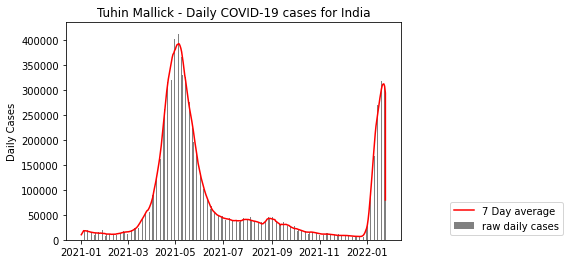

In [13]:
fig, ax = plt.subplots()

plt.bar(date_New, dailyCasesNew, color ='grey',width = 0.35)
plt.plot(date_New,weekly_average,color='red')
plt.ylabel("Daily Cases")
plt.legend(["7 Day average", "raw daily cases"],loc='lower right',bbox_to_anchor=(1.5,0))
plt.title("Tuhin Mallick - Daily COVID-19 cases for India")
plt.plot()
plt.savefig('uq05itim.pdf', bbox_inches='tight')  